In [384]:
import warnings
warnings.filterwarnings("ignore")

# Data 

In [385]:
from sklearn.datasets import fetch_california_housing

In [386]:
data = fetch_california_housing(as_frame=True)

In [387]:
X, y = data['data'], data['target']
X. shape, y.shape

((20640, 8), (20640,))

In [388]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [389]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [390]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [391]:
y.describe() # * 100k$

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

<Axes: >

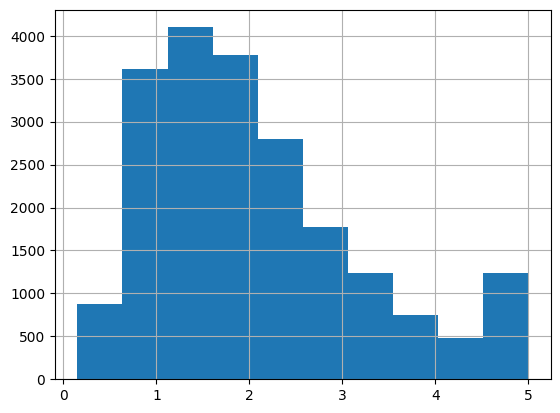

In [392]:
y.hist()

In [393]:
import seaborn as sns
import matplotlib.pyplot as plt

In [394]:
data=X.copy()
data['target'] = y

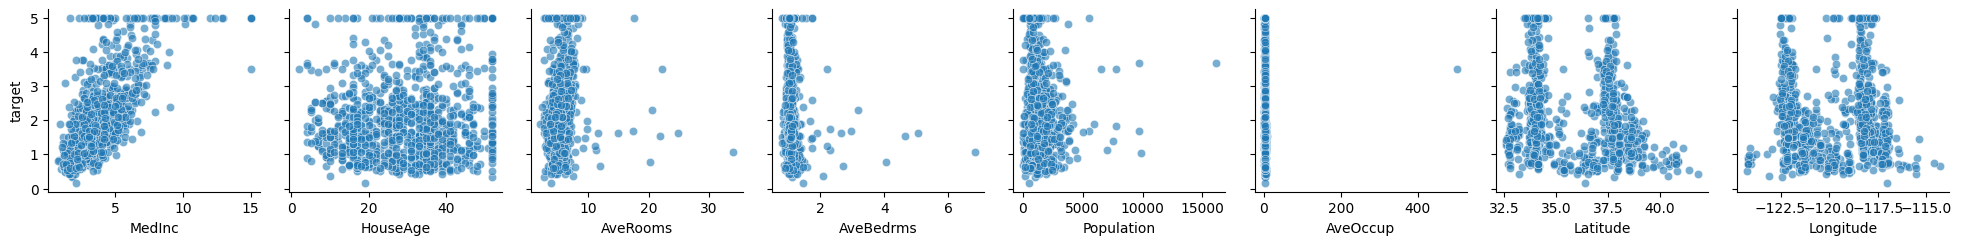

In [395]:
g = sns.PairGrid(data.sample(n=1000), 
                 x_vars=data.columns[:-1],
                 y_vars=['target'])

g.map(sns.scatterplot, alpha=0.6)
g.add_legend()
plt.show()

## Conclusion

| | |
|-----------|-------|
| Type | Regression |
| Target | Price |
| Data set size | 20k |
| Metrics | MAE, MSE, R^2 |
| Data dependencies | linear(MedInc), nonlinear(other) |

# Model

In [396]:
from sklearn.model_selection import train_test_split

In [397]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8) 
# mid-size data set -> priority to train (standard proportion)

In [398]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

In [399]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 1000, step=100),
        'max_depth': trial.suggest_int('max_depth', 4, 7, step=1),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', 1.0]),
        'random_state': 42,
        'n_jobs': -1
    }

    model = RandomForestRegressor(**params) # nonlin, productive and reliable

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = root_mean_squared_error(y_test, y_pred) # big error -> big^2 loss
    
    return rmse

In [400]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=25, show_progress_bar=True)

[I 2025-09-27 11:03:30,821] A new study created in memory with name: no-name-79391e12-83ba-4b49-bb9c-e48ef2ab2e94
Best trial: 0. Best value: 0.589108:   4%|▍         | 1/25 [00:07<02:50,  7.09s/it]

[I 2025-09-27 11:03:37,910] Trial 0 finished with value: 0.5891078512362149 and parameters: {'n_estimators': 900, 'max_depth': 7, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_features': 1.0}. Best is trial 0 with value: 0.5891078512362149.


Best trial: 0. Best value: 0.589108:   8%|▊         | 2/25 [00:09<01:35,  4.15s/it]

[I 2025-09-27 11:03:40,010] Trial 1 finished with value: 0.6428877800007688 and parameters: {'n_estimators': 1000, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5891078512362149.


Best trial: 0. Best value: 0.589108:  12%|█▏        | 3/25 [00:13<01:28,  4.03s/it]

[I 2025-09-27 11:03:43,891] Trial 2 finished with value: 0.6520403871809973 and parameters: {'n_estimators': 700, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 0 with value: 0.5891078512362149.


Best trial: 3. Best value: 0.582462:  16%|█▌        | 4/25 [00:15<01:07,  3.21s/it]

[I 2025-09-27 11:03:45,853] Trial 3 finished with value: 0.5824619823925846 and parameters: {'n_estimators': 700, 'max_depth': 7, 'min_samples_split': 13, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 3 with value: 0.5824619823925846.


Best trial: 3. Best value: 0.582462:  20%|██        | 5/25 [00:16<00:50,  2.50s/it]

[I 2025-09-27 11:03:47,097] Trial 4 finished with value: 0.6425406043156097 and parameters: {'n_estimators': 700, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.5824619823925846.


Best trial: 3. Best value: 0.582462:  24%|██▍       | 6/25 [00:18<00:45,  2.39s/it]

[I 2025-09-27 11:03:49,268] Trial 5 finished with value: 0.6146228112594633 and parameters: {'n_estimators': 900, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 3 with value: 0.5824619823925846.


Best trial: 6. Best value: 0.582124:  28%|██▊       | 7/25 [00:20<00:40,  2.25s/it]

[I 2025-09-27 11:03:51,219] Trial 6 finished with value: 0.58212412523997 and parameters: {'n_estimators': 700, 'max_depth': 7, 'min_samples_split': 11, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 6 with value: 0.58212412523997.


Best trial: 6. Best value: 0.582124:  32%|███▏      | 8/25 [00:21<00:31,  1.87s/it]

[I 2025-09-27 11:03:52,278] Trial 7 finished with value: 0.7041907194752577 and parameters: {'n_estimators': 600, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 6 with value: 0.58212412523997.


Best trial: 6. Best value: 0.582124:  36%|███▌      | 9/25 [00:22<00:26,  1.67s/it]

[I 2025-09-27 11:03:53,499] Trial 8 finished with value: 0.7041741106314078 and parameters: {'n_estimators': 700, 'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 6 with value: 0.58212412523997.


Best trial: 6. Best value: 0.582124:  40%|████      | 10/25 [00:24<00:23,  1.59s/it]

[I 2025-09-27 11:03:54,925] Trial 9 finished with value: 0.6042350797952272 and parameters: {'n_estimators': 700, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 6 with value: 0.58212412523997.


Best trial: 6. Best value: 0.582124:  44%|████▍     | 11/25 [00:25<00:19,  1.42s/it]

[I 2025-09-27 11:03:55,969] Trial 10 finished with value: 0.6551943263847854 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 6 with value: 0.58212412523997.


Best trial: 6. Best value: 0.582124:  48%|████▊     | 12/25 [00:27<00:21,  1.65s/it]

[I 2025-09-27 11:03:58,152] Trial 11 finished with value: 0.5839472980828333 and parameters: {'n_estimators': 800, 'max_depth': 7, 'min_samples_split': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 6 with value: 0.58212412523997.


Best trial: 6. Best value: 0.582124:  52%|█████▏    | 13/25 [00:28<00:19,  1.64s/it]

[I 2025-09-27 11:03:59,762] Trial 12 finished with value: 0.5823401820394104 and parameters: {'n_estimators': 600, 'max_depth': 7, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 6 with value: 0.58212412523997.


Best trial: 6. Best value: 0.582124:  56%|█████▌    | 14/25 [00:30<00:17,  1.58s/it]

[I 2025-09-27 11:04:01,198] Trial 13 finished with value: 0.5829490765178921 and parameters: {'n_estimators': 500, 'max_depth': 7, 'min_samples_split': 16, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 6 with value: 0.58212412523997.


Best trial: 6. Best value: 0.582124:  60%|██████    | 15/25 [00:33<00:21,  2.10s/it]

[I 2025-09-27 11:04:04,521] Trial 14 finished with value: 0.6185103851419098 and parameters: {'n_estimators': 600, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 1.0}. Best is trial 6 with value: 0.58212412523997.


Best trial: 6. Best value: 0.582124:  64%|██████▍   | 16/25 [00:35<00:17,  1.97s/it]

[I 2025-09-27 11:04:06,165] Trial 15 finished with value: 0.5826810157005903 and parameters: {'n_estimators': 600, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 6 with value: 0.58212412523997.


Best trial: 6. Best value: 0.582124:  68%|██████▊   | 17/25 [00:37<00:15,  1.89s/it]

[I 2025-09-27 11:04:07,875] Trial 16 finished with value: 0.6551711285459221 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 6 with value: 0.58212412523997.


Best trial: 6. Best value: 0.582124:  72%|███████▏  | 18/25 [00:38<00:12,  1.77s/it]

[I 2025-09-27 11:04:09,381] Trial 17 finished with value: 0.6151427286837681 and parameters: {'n_estimators': 600, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 6 with value: 0.58212412523997.


Best trial: 6. Best value: 0.582124:  76%|███████▌  | 19/25 [00:39<00:09,  1.54s/it]

[I 2025-09-27 11:04:10,374] Trial 18 finished with value: 0.6044459416113817 and parameters: {'n_estimators': 500, 'max_depth': 7, 'min_samples_split': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 6 with value: 0.58212412523997.


Best trial: 6. Best value: 0.582124:  80%|████████  | 20/25 [00:44<00:12,  2.45s/it]

[I 2025-09-27 11:04:14,939] Trial 19 finished with value: 0.6186224996061961 and parameters: {'n_estimators': 800, 'max_depth': 6, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 1.0}. Best is trial 6 with value: 0.58212412523997.


Best trial: 6. Best value: 0.582124:  84%|████████▍ | 21/25 [00:45<00:08,  2.22s/it]

[I 2025-09-27 11:04:16,613] Trial 20 finished with value: 0.5825875968420656 and parameters: {'n_estimators': 600, 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 6 with value: 0.58212412523997.


Best trial: 21. Best value: 0.5821:  88%|████████▊ | 22/25 [00:47<00:06,  2.11s/it] 

[I 2025-09-27 11:04:18,483] Trial 21 finished with value: 0.5821002806771983 and parameters: {'n_estimators': 700, 'max_depth': 7, 'min_samples_split': 13, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 21 with value: 0.5821002806771983.


Best trial: 21. Best value: 0.5821:  92%|█████████▏| 23/25 [00:49<00:04,  2.14s/it]

[I 2025-09-27 11:04:20,687] Trial 22 finished with value: 0.5826152997734014 and parameters: {'n_estimators': 800, 'max_depth': 7, 'min_samples_split': 18, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 21 with value: 0.5821002806771983.


Best trial: 21. Best value: 0.5821:  96%|█████████▌| 24/25 [00:51<00:01,  1.99s/it]

[I 2025-09-27 11:04:22,322] Trial 23 finished with value: 0.5826067775832324 and parameters: {'n_estimators': 600, 'max_depth': 7, 'min_samples_split': 11, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 21 with value: 0.5821002806771983.


Best trial: 21. Best value: 0.5821: 100%|██████████| 25/25 [00:53<00:00,  2.13s/it]

[I 2025-09-27 11:04:24,012] Trial 24 finished with value: 0.6147306042851125 and parameters: {'n_estimators': 700, 'max_depth': 6, 'min_samples_split': 14, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 21 with value: 0.5821002806771983.


In [401]:
best_params = study.best_params
best_rmse = study.best_value

In [402]:
print(f"Best RMSE: {best_rmse:.4f}")
print(f"Best parameters: {best_params}")

Best RMSE: 0.5821
Best parameters: {'n_estimators': 700, 'max_depth': 7, 'min_samples_split': 13, 'min_samples_leaf': 7, 'max_features': 'log2'}


# Tests

### On train

In [403]:
final_model = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
final_model.fit(X_train, y_train)
y_pred_test = final_model.predict(X_train)

In [404]:
final_mae = mean_absolute_error(y_train, y_pred_test) # absolute error
final_r2 = r2_score(y_train, y_pred_test) # no comments

print("Final metrics:")
print(f"MAE: {final_mae:.4f}")
print(f"R^2: {final_r2:.4f}")

Final metrics:
MAE: 0.4101
R^2: 0.7568


### On test

In [405]:
final_model = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
final_model.fit(X_train, y_train)
y_pred_test = final_model.predict(X_test)

In [406]:
final_mae = mean_absolute_error(y_test, y_pred_test) # absolute error
final_r2 = r2_score(y_test, y_pred_test) # no comments

print("Final metrics:")
print(f"MAE: {final_mae:.4f}")
print(f"R^2: {final_r2:.4f}")

Final metrics:
MAE: 0.4219
R^2: 0.7376


# Plots

## Predicted vs Actual Plot

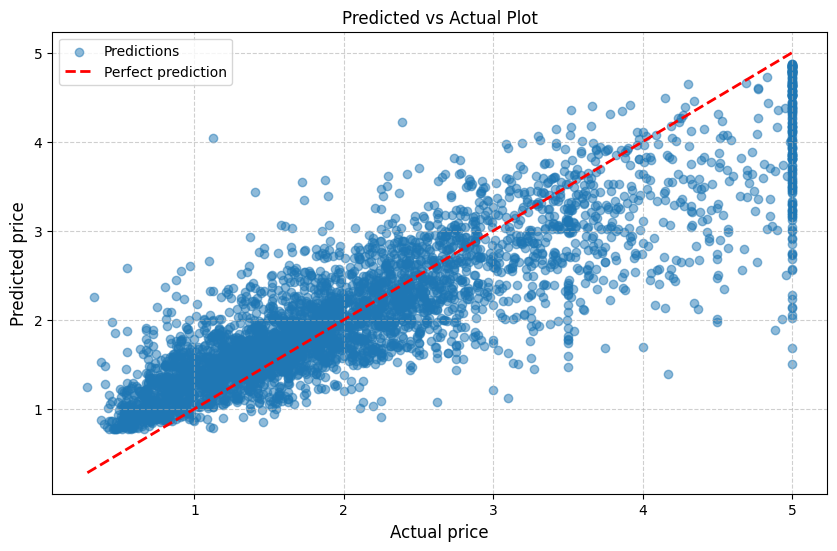

In [407]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect prediction') # y=x

plt.title('Predicted vs Actual Plot')
plt.xlabel('Actual price', fontsize=12)
plt.ylabel('Predicted price', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Residuals vs Predicted Plot

In [408]:
residuals = y_test - y_pred_test

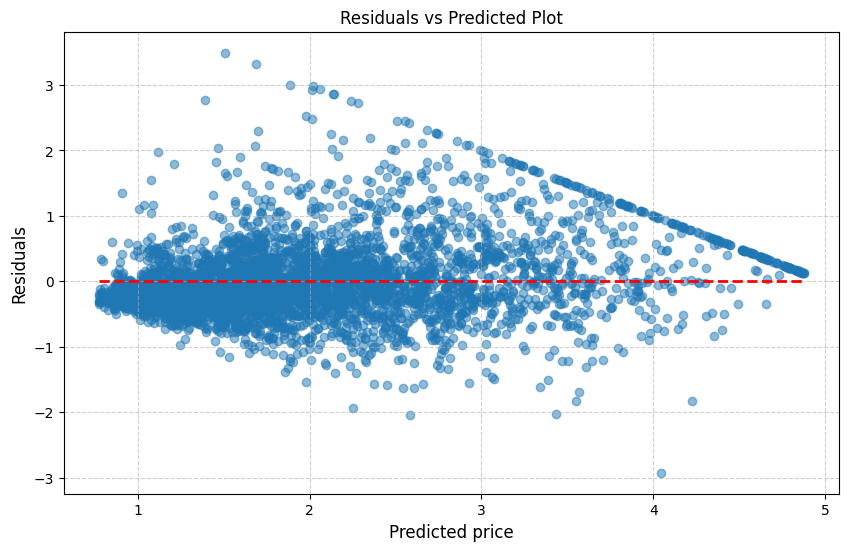

In [409]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred_test.min(), xmax=y_pred_test.max(), color='red', linestyle='--', lw=2)

plt.title('Residuals vs Predicted Plot')
plt.xlabel('Predicted price', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()